In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns',None)
%matplotlib inline

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
os.getcwd()

'E:\\Complete Machine Learning\\datasets\\titanic'

In [21]:
os.chdir('E:\\Complete Machine Learning\\datasets\\titanic')

In [345]:
train=pd.read_csv('train.csv',index_col=0)

In [10]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [346]:
df=train.copy()

In [12]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [13]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
print(X.isnull().sum())

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [28]:
## Percentage of missing values
print('% of missing values in Cabin is {:.2f} %'.format(X['Cabin'].isnull().sum()/len(X['Cabin'])*100))
print('% of missing values in Age is {:.2f} %'.format(X['Age'].isnull().sum()/len(X['Age'])*100))
print('% of missing values in Embarked is {:.2f} %'.format(X['Embarked'].isnull().sum()/len(X['Age'])*100))

% of missing values in Cabin is 77.10 %
% of missing values in Age is 19.87 %
% of missing values in Embarked is 0.22 %


So, Cabin has the highest no of missing values 

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [116]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes !='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtypes =='O']

print(numerical_feature)
print(categorical_feature)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [117]:
i=0
while i<len(numerical_feature):
    if df[numerical_feature[i]].nunique()<10:
        categorical_feature.append(numerical_feature[i])
        numerical_feature.remove(numerical_feature[i])
    else:
        i=i+1

In [118]:
print(numerical_feature)
print(categorical_feature)

['Age', 'Fare']
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']


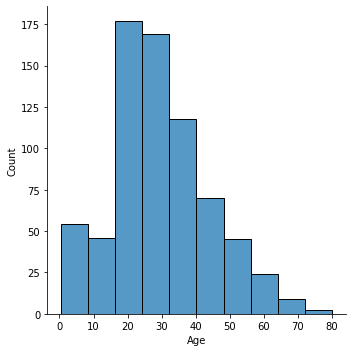

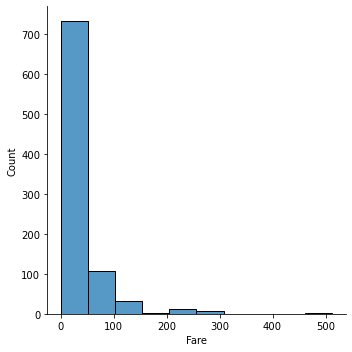

In [119]:
for feature in numerical_feature:
    sns.displot(x=df[feature],bins=10)

In [131]:
categorical_feature

['Sex', 'Cabin', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

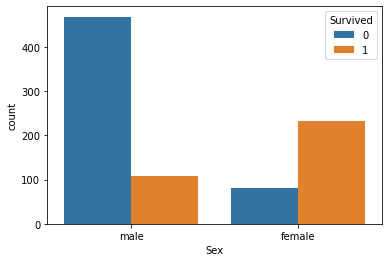

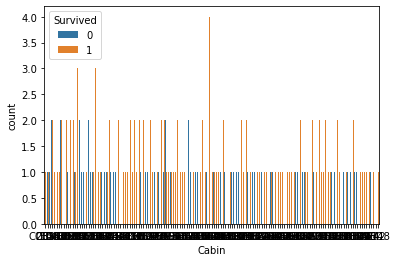

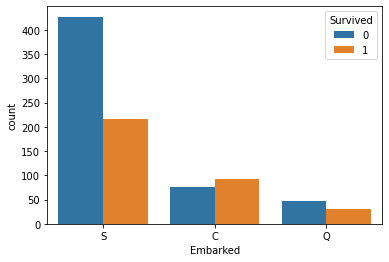

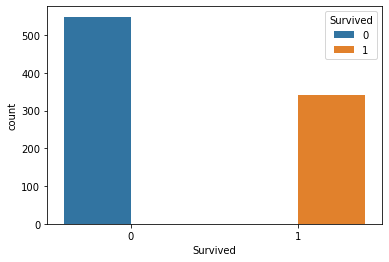

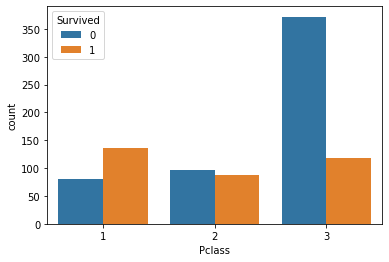

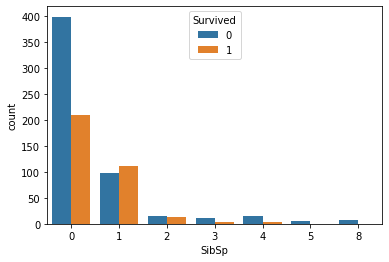

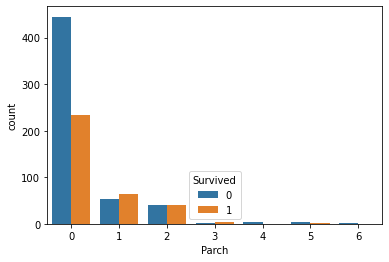

In [165]:

for feature in categorical_feature:
    sns.countplot(x=feature,data=df,hue='Survived')
    plt.show()

No of survival for women is higher than that of male.
People Embarked on S port has lost life more than people who embarked on other ports.
People of Pclass:3 lost life more than higher class people.
    

In [154]:
#We will check if data is imbalanced or not

print('Ratio of Survived and not Survived in dataset is : {:.2f} %'.format(len(df[df['Survived']==1])/len(df[df['Survived']==0])*100))

Ratio of Survived and not Survived in dataset is : 62.30 %


So,Data is not imbalanced

In [347]:
df['Sex']=df['Sex'].replace({
    'male':0,
    'female':1
})

<AxesSubplot:>

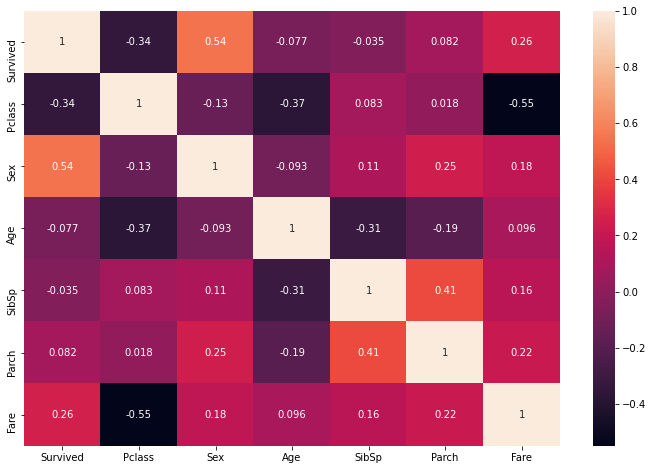

In [201]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

We can see here Sex has the strongest correlation with Survived column.
Plcass and Fare are highly correlated.
SibSp and Parch does not play significant role in survival.


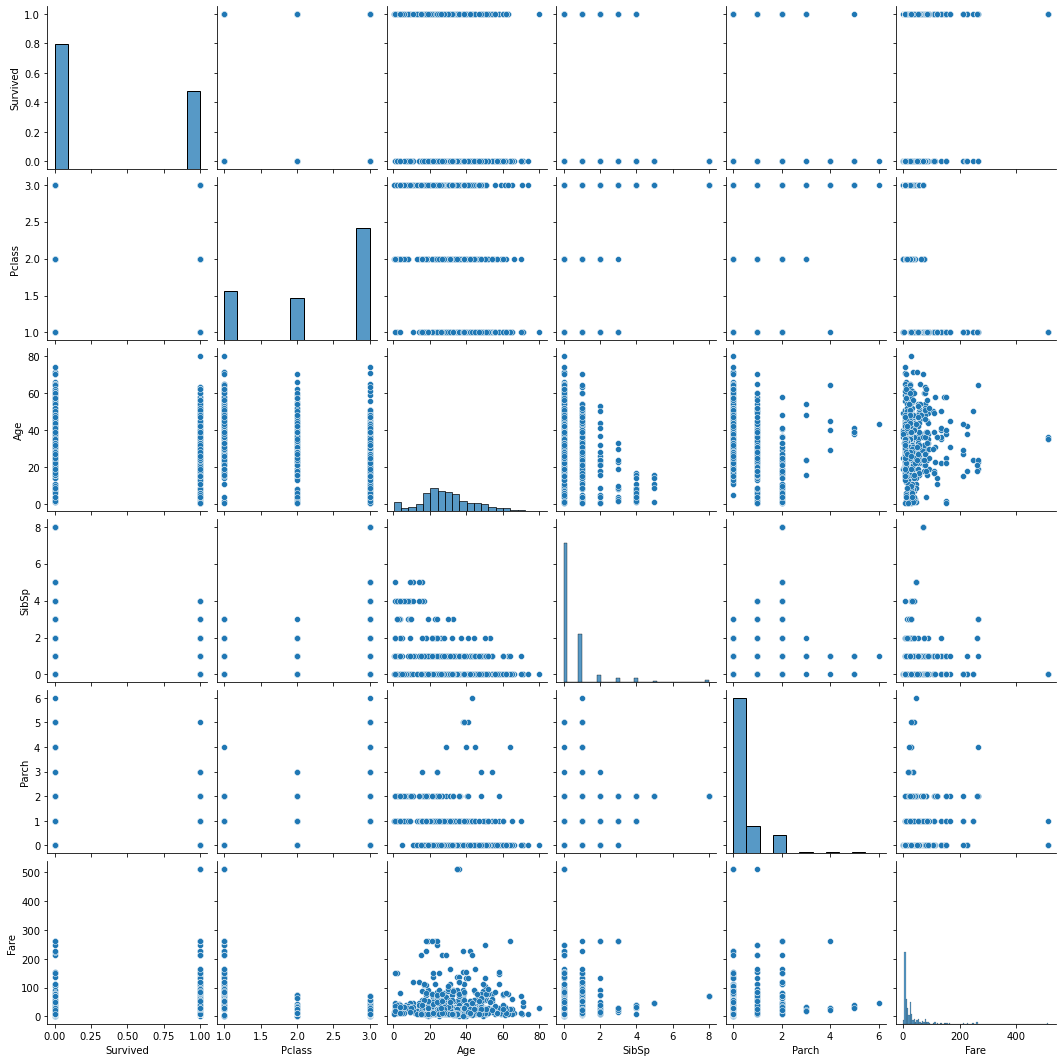

In [159]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='Age', ylabel='Density'>

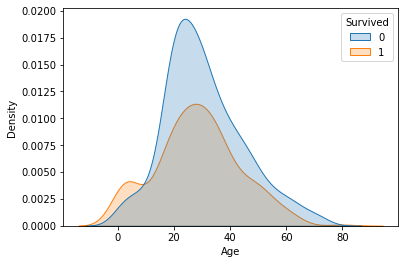

In [171]:
sns.kdeplot(x=df['Age'],hue=df['Survived'],shade=True)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

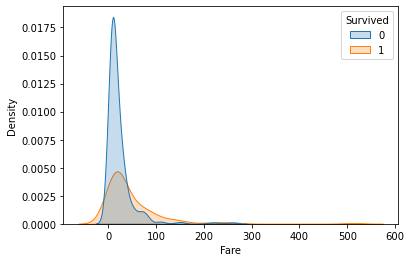

In [172]:
sns.kdeplot(x=df['Fare'],hue=df['Survived'],shade=True)

In [210]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


Two Women have no idea where they embarked.they paid $80 each and we can see that C Location have most expensive fares.
So, we will use C as their location.

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

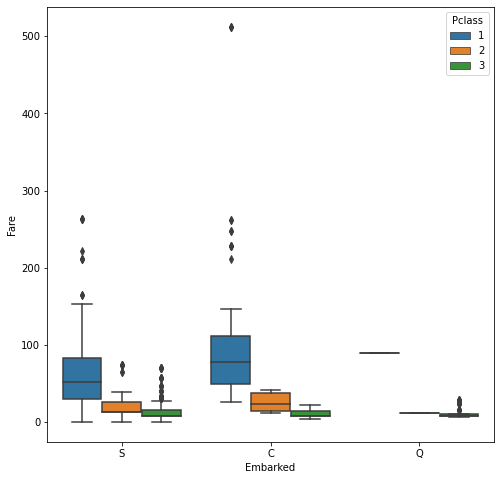

In [209]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df['Embarked'],y=df['Fare'],hue=df['Pclass'])

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

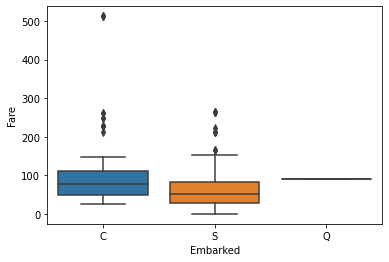

In [208]:
sns.boxplot(x=df[df['Pclass']==1]['Embarked'],y=df[df['Pclass']==1]['Fare'])

In [348]:
df['Embarked'].fillna('C',inplace=True)

In [349]:
#Since, cabin has 77% values missing. We can drop it confidently.
df.drop('Cabin',axis=1,inplace=True)

In [324]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [350]:
#For finding missing values of Age,we can either use Mean/Median/Mode imputation or 
#we can use RandomForestregressor to find the missigng values

X=df[df['Age'].isnull()]
X_age=df.dropna()
y_age=df['Age']
X_age.drop(['Age','Name','Ticket'],axis=1,inplace=True)
X_age=pd.get_dummies(X_age,drop_first=True)
y_age.dropna(inplace=True)

In [351]:
X.drop(['Name','Age','Ticket'],axis=1,inplace=True)
X=pd.get_dummies(X,drop_first=True)

In [352]:
from sklearn.ensemble import RandomForestRegressor

random= RandomForestRegressor()

In [353]:
random.fit(X_age,y_age)

RandomForestRegressor()

In [354]:
ls=df[df['Age'].isnull()].index

In [355]:
y_pred=random.predict(X)
y_pred=pd.Series(y_pred,index=ls)


In [356]:
df['Age'].fillna(y_pred,inplace=True)

In [357]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [358]:
df['Familysize']=df['SibSp']+df['Parch']+1

In [359]:
ls=df[df['Familysize']==1].index
df['IsAlone']=np.nan
df['IsAlone'][ls]=1

In [360]:
df['IsAlone'].fillna(0,inplace=True)

In [361]:
ls=df[df['Age']<18].index
df['Underage']=np.nan
df['Underage'][ls]= np.int(1)
df.fillna(np.int(0),inplace=True)

In [362]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familysize,IsAlone,Underage
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,2,0.0,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2,0.0,0.0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1.0,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2,0.0,0.0
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1,1.0,0.0


In [382]:
train=df.copy()
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familysize,IsAlone,Underage
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,2,0.0,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2,0.0,0.0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1.0,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2,0.0,0.0
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S,1,1.0,0.0
888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S,1,1.0,0.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,22.9,1,2,W./C. 6607,23.4500,S,4,0.0,0.0


In [384]:
import re
train['Designation']=train['Name'].str.findall('Mr.|Mrs.|Miss.|Dr.',flags=0)

In [309]:
train['Desig']=train['Name'].str.contains('Mr.|Mrs.|Miss.|Dr.',case=False)

In [390]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familysize,IsAlone,Underage,Dr.,Miss.,Mr,Mr.,Mrs
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,2,0.0,0.0,0,0,0,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2,0.0,0.0,0,0,0,0,1
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1.0,0.0,0,1,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2,0.0,0.0,0,0,0,0,1
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1,1.0,0.0,0,0,0,1,0


In [389]:
train.drop(['Dra','Dre','Dri'],axis=1,inplace=True)

In [387]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
train=train.join(pd.DataFrame(mlb.fit_transform(train.pop('Designation')),
                             columns=mlb.classes_,
                             index=train.index))

KeyError: 'Designation'

In [392]:
train.to_csv('d2.csv')

In [5]:
train=pd.read_csv('d1.csv',index_col=0)

In [6]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familysize,IsAlone,Underage
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,2,0.0,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2,0.0,0.0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1.0,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2,0.0,0.0
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1,1.0,0.0


In [7]:
df=train.copy()

In [8]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [9]:
df=pd.get_dummies(df,drop_first=True)

In [10]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Familysize,IsAlone,Underage,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2,0.0,0.0,0,1
2,1,1,1,38.0,1,0,71.2833,2,0.0,0.0,0,0
3,1,3,1,26.0,0,0,7.9250,1,1.0,0.0,0,1
4,1,1,1,35.0,1,0,53.1000,2,0.0,0.0,0,1
5,0,3,0,35.0,0,0,8.0500,1,1.0,0.0,0,1


In [11]:
#Standardization/Normalization 

from sklearn.preprocessing import Normalizer
normal=Normalizer()
normal.fit(df)

Normalizer()

In [12]:
scaled_data=normal.transform(df)

In [13]:
df_scaled=pd.DataFrame(scaled_data,columns=df.columns)

In [14]:
df_scaled.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Familysize,IsAlone,Underage,Embarked_Q,Embarked_S
0,0.000000,0.127739,0.000000,0.936753,0.042580,0.0,0.308703,0.085159,0.000000,0.0,0.0,0.042580
1,0.012372,0.012372,0.012372,0.470129,0.012372,0.0,0.881904,0.024744,0.000000,0.0,0.0,0.000000
2,0.036447,0.109340,0.036447,0.947615,0.000000,0.0,0.288840,0.036447,0.036447,0.0,0.0,0.036447
3,0.015706,0.015706,0.015706,0.549727,0.015706,0.0,0.834014,0.031413,0.000000,0.0,0.0,0.015706
4,0.000000,0.083147,0.000000,0.970053,0.000000,0.0,0.223112,0.027716,0.027716,0.0,0.0,0.027716


In [15]:
df_scaled.drop('Survived',axis=1,inplace=True)

In [16]:
y_train=df['Survived']

In [32]:
y_train.head(5)

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [33]:
test=pd.read_csv('test.csv',index_col='PassengerId')

In [34]:
test.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [39]:
test['Sex']=test['Sex'].replace({
    'male':0,
    'female':1
})

In [41]:
test.drop(['Cabin'],axis=1,inplace=True)

In [69]:
tf=test.copy()

In [70]:
tf.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S
894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q
895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S


In [71]:
X=tf[tf['Age'].isnull()]
X_age=tf.dropna()
y_age=tf['Age']
X_age.drop(['Age','Name','Ticket'],axis=1,inplace=True)
X_age=pd.get_dummies(X_age,drop_first=True)
y_age.dropna(inplace=True)

In [74]:
X.shape

(86, 7)

In [73]:
X.drop(['Name','Age','Ticket'],axis=1,inplace=True)
X=pd.get_dummies(X,drop_first=True)

In [65]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()

In [66]:
random.fit(X_age,y_age)

RandomForestRegressor()

In [76]:
y_pred=random.predict(X)
y_pred=pd.Series(y_pred,index=ls)

In [77]:
tf['Age'].fillna(y_pred,inplace=True)

In [87]:
tf[tf['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,S


<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

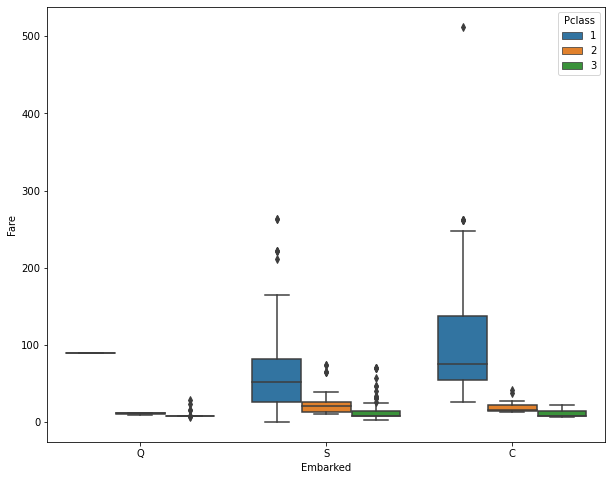

In [89]:
plt.figure(figsize=(10,8))
sns.boxplot(x=tf['Embarked'],y=tf['Fare'],hue=tf['Pclass'])

In [97]:
d=tf[tf['Embarked']=='S']
d=d[d['Pclass']==3]
d['Fare'].mean()

13.91302978723404

In [98]:
tf['Fare'].fillna(14.0,inplace=True)

In [100]:
tf['Familysize']=tf['SibSp']+tf['Parch']+1

In [102]:
ls=tf[tf['Familysize']==1].index
tf['IsAlone']=np.nan
tf['IsAlone'][ls]=1

In [103]:
tf['IsAlone'].fillna(0,inplace=True)

In [105]:
ls=tf[tf['Age']<18].index
tf['Underage']=np.nan
tf['Underage'][ls]= np.int(1)
tf.fillna(np.int(0),inplace=True)

In [109]:
tf.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize,IsAlone,Underage
PassengerId,,,,,,,,,,
892,3,0,34.5,0,0,7.8292,Q,1,1.0,0.0
893,3,1,47.0,1,0,7.0000,S,2,0.0,0.0
894,2,0,62.0,0,0,9.6875,Q,1,1.0,0.0
895,3,0,27.0,0,0,8.6625,S,1,1.0,0.0
896,3,1,22.0,1,1,12.2875,S,3,0.0,0.0


In [107]:
tf.to_csv('t1.csv')

In [23]:
tf.drop(['Name','Ticket'],axis=1,inplace=True)

In [24]:
tf= pd.get_dummies(tf,drop_first=True)

In [114]:
df_scaled.shape,tf.shape,y_train.shape

((891, 11), (418, 11), (891,))

In [25]:
X_train=df_scaled.copy()
X_test=tf.copy()

In [170]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Familysize',
       'IsAlone', 'Underage', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [126]:
def model(classifier,X,y,X_test):
    classifier.fit(X,y)
    y_pred=classifier.predict(X_test)
    return y_pred
    

In [118]:
from sklearn.linear_model  import LogisticRegression
log_reg=LogisticRegression()

In [146]:
y_pred=model(log_reg,X_train,y_train,X_test)

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4,5]}
]

forest_reg= RandomForestRegressor()

grid_search=GridSearchCV(forest_reg,param_grid,cv=5,
                        scoring='neg_mean_squared_error',
                        return_train_score=True)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 5],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [160]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [162]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [164]:
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

0.43089782636027346 {'max_features': 2, 'n_estimators': 3}
0.3912005249629385 {'max_features': 2, 'n_estimators': 10}
0.3879524411267535 {'max_features': 2, 'n_estimators': 30}
0.42595786096419713 {'max_features': 4, 'n_estimators': 3}
0.40737080907247614 {'max_features': 4, 'n_estimators': 10}
0.38217535258771124 {'max_features': 4, 'n_estimators': 30}
0.42974708216338614 {'max_features': 6, 'n_estimators': 3}
0.39646173773096005 {'max_features': 6, 'n_estimators': 10}
0.39321678776182073 {'max_features': 6, 'n_estimators': 30}
0.43894165592195766 {'max_features': 8, 'n_estimators': 3}
0.40072505061663133 {'max_features': 8, 'n_estimators': 10}
0.3917000995404126 {'max_features': 8, 'n_estimators': 30}
0.4363831553423577 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.40916206585328135 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4519598544729039 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.41660914381249364 {'bootstrap': False, 'max_featu

In [167]:
feature_importance=grid_search.best_estimator_.feature_importances_
feature_importance

array([0.14640225, 0.2377402 , 0.11312002, 0.05347321, 0.02887016,
       0.14389679, 0.10340854, 0.05650431, 0.02241139, 0.01847335,
       0.07569977])

In [169]:
sorted(zip(feature_importance,df.columns),reverse=True)

[(0.23774019707131022, 'Pclass'),
 (0.1464022515582538, 'Survived'),
 (0.1438967940649274, 'Parch'),
 (0.11312002251684819, 'Sex'),
 (0.10340854452179202, 'Fare'),
 (0.07569976765786036, 'Embarked_Q'),
 (0.05650431206054477, 'Familysize'),
 (0.05347320685549771, 'Age'),
 (0.028870158686168705, 'SibSp'),
 (0.022411391785096175, 'IsAlone'),
 (0.018473353221700503, 'Underage')]

In [171]:
final_model=grid_search.best_estimator_
y_pred=final_model.predict(X_test)

In [57]:
submission=pd.read_csv('gender_submission.csv')

In [174]:
y_pred=np.where(y_pred>0.5,1,0)

In [177]:
y_pred=pd.Series(y_pred,index=tf.index)
y_pred.value_counts()

1    332
0     86
dtype: int64

In [178]:
submission['Survived']=y_pred


In [179]:
submission.to_csv('s2_random.csv')

In [20]:
test=pd.read_csv('t1.csv',index_col=0)

In [21]:
test.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familysize,IsAlone,Underage
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q,1,1.0,0.0
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S,2,0.0,0.0
894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q,1,1.0,0.0
895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S,1,1.0,0.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S,3,0.0,0.0


In [22]:
tf=test.copy()

In [28]:
X_train.shape,X_test.shape

((891, 11), (418, 11))

In [29]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')

In [31]:
y_train.to_csv('y_train.csv')

In [33]:
import tensorflow as tf
from tensorflow import keras

In [53]:
model=keras.models.Sequential([
    keras.layers.Dense(512,activation='relu',input_shape=(891,11)),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics='accuracy')

model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
28/28 [==============================] - 1s 2ms/step - loss: 0.6445 - accuracy: 0.6409
Epoch 2/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.6700
Epoch 3/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.5950 - accuracy: 0.6891
Epoch 4/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.6947
Epoch 5/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.5826 - accuracy: 0.6981
Epoch 6/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.6936
Epoch 7/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.6914
Epoch 8/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.7071
Epoch 9/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.6992
Epoch 10/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.7149

Epoch 76/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.8092
Epoch 77/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8081
Epoch 78/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.8025
Epoch 79/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.8025
Epoch 80/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8025
Epoch 81/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.4450 - accuracy: 0.8047
Epoch 82/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.8047
Epoch 83/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8058
Epoch 84/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.8081
Epoch 85/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.4385 - accurac

28/28 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.8081
Epoch 237/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8227
Epoch 238/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8204
Epoch 239/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8215
Epoch 240/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8328
Epoch 241/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8249
Epoch 242/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8316
Epoch 243/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.8193
Epoch 244/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8182
Epoch 245/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.

28/28 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8305
Epoch 317/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3782 - accuracy: 0.8249
Epoch 318/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8361
Epoch 319/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8305
Epoch 320/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8406
Epoch 321/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8339
Epoch 322/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8373
Epoch 323/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8316
Epoch 324/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8384
Epoch 325/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.

28/28 [==============================] - 0s 2ms/step - loss: 0.3650 - accuracy: 0.8462
Epoch 477/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3657 - accuracy: 0.8395
Epoch 478/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8474
Epoch 479/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.8406
Epoch 480/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.8474
Epoch 481/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8507
Epoch 482/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3651 - accuracy: 0.8451
Epoch 483/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.8418
Epoch 484/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3619 - accuracy: 0.8485
Epoch 485/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 0.

28/28 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.8541
Epoch 557/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8563
Epoch 558/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8485
Epoch 559/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8597
Epoch 560/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8563
Epoch 561/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8552
Epoch 562/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.8530
Epoch 563/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.8496
Epoch 564/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8519
Epoch 565/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.

28/28 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.8608
Epoch 717/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3517 - accuracy: 0.8575
Epoch 718/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8631
Epoch 719/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8620
Epoch 720/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8698
Epoch 721/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8597
Epoch 722/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8664
Epoch 723/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8653
Epoch 724/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8676
Epoch 725/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.

28/28 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8721
Epoch 877/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8676
Epoch 878/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8698
Epoch 879/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.3323 - accuracy: 0.8754
Epoch 880/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8721
Epoch 881/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8732
Epoch 882/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8664
Epoch 883/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8743
Epoch 884/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8709
Epoch 885/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.

28/28 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.8642
Epoch 957/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8608
Epoch 958/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8698
Epoch 959/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8687
Epoch 960/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3305 - accuracy: 0.8664
Epoch 961/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8676
Epoch 962/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.3310 - accuracy: 0.8765
Epoch 963/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8698
Epoch 964/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8721
Epoch 965/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.

In [55]:
y_pred=model.predict(X_test)

In [56]:
y_pred=[int(round(i[0])) for i in y_pred]

In [57]:
y_pred

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,


In [58]:
submission=pd.read_csv('gender_submission.csv',index_col=0)
submission['Survived']=y_pred
submission.to_csv('s4_nn.csv')

In [7]:
train=pd.read_csv('d1.csv')

In [8]:
train['Title'] = train['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [9]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familysize,IsAlone,Underage,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,2,0.0,0.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2,0.0,0.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1.0,0.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2,0.0,0.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1,1.0,0.0,Mr


In [9]:
train.drop(['Name','Ticket','SibSp','Parch'],axis=1,inplace=True)

<AxesSubplot:xlabel='Title', ylabel='count'>

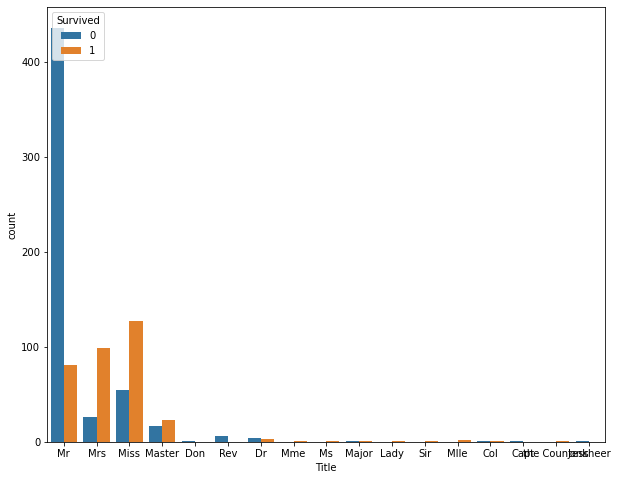

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(x='Title',data=train,hue='Survived')

In [11]:
train=pd.get_dummies(train,drop_first=True)

In [35]:
train.to_csv('train_clean.csv')

In [5]:
train=pd.read_csv('train_clean.csv',index_col='PassengerId')

In [6]:
train['Title'] = train['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

KeyError: 'Name'

In [33]:
train.drop('Unnamed: 0',axis=1,inplace=True)

In [34]:
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Familysize,IsAlone,Underage,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,0,22.0,7.2500,2,0.0,0.0,0,1
2,1,1,1,38.0,71.2833,2,0.0,0.0,0,0
3,1,3,1,26.0,7.9250,1,1.0,0.0,0,1
4,1,1,1,35.0,53.1000,2,0.0,0.0,0,1
5,0,3,0,35.0,8.0500,1,1.0,0.0,0,1


In [17]:
test=pd.read_csv('t1.csv',index_col=0)

In [29]:
test.head(5)

,Pclass,Sex,Age,Fare,Familysize,IsAlone,Underage,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
892,3,0,34.5,7.8292,1,1.0,0.0,1,0
893,3,1,47.0,7.0000,2,0.0,0.0,0,1
894,2,0,62.0,9.6875,1,1.0,0.0,1,0
895,3,0,27.0,8.6625,1,1.0,0.0,0,1
896,3,1,22.0,12.2875,3,0.0,0.0,0,1


In [19]:
test.drop(['Name','Ticket','SibSp','Parch'],axis=1,inplace=True)

In [20]:
test=pd.get_dummies(test,drop_first=True)

In [21]:
test.to_csv('test_clean.csv')

## Predictive Modeling

In [28]:
X_train=train.drop('Survived',axis=1)
y_train=train['Survived']

In [29]:
from sklearn.preprocessing import StandardScaler
X_train_scale=StandardScaler().fit_transform(X_train)
pd.DataFrame(X_train_scale).head()

,0,1,2,3,4,5,6,7,8
0,0.827377,-0.737695,-0.552378,-0.502445,0.059160,-1.231645,-0.417029,-0.307562,0.619306
1,-1.566107,1.355574,0.605490,0.786845,0.059160,-1.231645,-0.417029,-0.307562,-1.614710
2,0.827377,1.355574,-0.262911,-0.488854,-0.560975,0.811922,-0.417029,-0.307562,0.619306
3,-1.566107,1.355574,0.388389,0.420730,0.059160,-1.231645,-0.417029,-0.307562,0.619306
4,0.827377,-0.737695,0.388389,-0.486337,-0.560975,0.811922,-0.417029,-0.307562,0.619306


In [30]:
X_test_scale=StandardScaler().fit_transform(test)

### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression().fit(X_train_scale,y_train)
y_pred=LR.predict(X_test_scale)

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LogisticRegression(),X_train_scale,y_train,cv=5)
print(scores)
print(scores.mean())

[0.78212291 0.80337079 0.78651685 0.79213483 0.84831461]
0.8024919967359236


### GridSearch CV

In [51]:
from sklearn.model_selection import GridSearchCV
param_grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}

scores= GridSearchCV(LogisticRegression(),param_grid).fit(X_train_scale,y_train)
print(scores.best_params_)
print(scores.best_score_)

{'C': 1.0, 'penalty': 'l2'}
0.8024919967359236


In [58]:
data={
    'PassengerId':submission['PassengerId'],
    'Survived':y_pred
}
result=pd.DataFrame(data)
result.to_csv('LR.csv',index=False)

### RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier().fit(X_train_scale,y_train)
y_pred=rf.predict(X_test_scale)

from sklearn.model_selection import cross_val_score
scores=cross_val_score(RandomForestClassifier(),X_train_scale,y_train,cv=5)
print(scores)
print(scores.mean())

[0.81005587 0.80898876 0.87078652 0.78651685 0.84269663]
0.8238089259933462


In [61]:
data={
    'PassengerId':submission['PassengerId'],
    'Survived':y_pred
}
result=pd.DataFrame(data)
result.to_csv('RFC.csv',index=False)

### Support Vector Classifier

In [63]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',C=1).fit(X_train_scale,y_train)
y_pred=svc.predict(X_test_scale)

from sklearn.model_selection import cross_val_score
scores=cross_val_score(SVC(),X_train_scale,y_train,cv=5)
print(scores)
print(scores.mean())

[0.84916201 0.80898876 0.82022472 0.79775281 0.85393258]
0.8260121775155358


In [65]:
data={
    'PassengerId':submission['PassengerId'],
    'Survived':y_pred
}
result=pd.DataFrame(data)
result.to_csv('SVC.csv',index=False)

### Stochastic Gradient Classifier

In [68]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
sgd=SGDClassifier()
scores=cross_val_score(sgd,X_train_scale,y_train,cv=5)
print(scores)
print(scores.mean())

y_pred=sdg.fit(X_train_scale,y_train).predict(X_test_scale)

data={
    'PassengerId':submission['PassengerId'],
    'Survived':y_pred
}
result=pd.DataFrame(data)
result.to_csv('SGC.csv',index=False)

[0.7150838  0.78651685 0.71348315 0.7752809  0.74157303]
0.7463875462933902


### Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier()
scores=cross_val_score(dtc,X_train_scale,y_train,cv=5)
print(scores)
print(scores.mean())

y_pred=dtc.fit(X_train_scale,y_train).predict(X_test_scale)

data={
    'PassengerId':submission['PassengerId'],
    'Survived':y_pred
}
result=pd.DataFrame(data)
result.to_csv('DTC.csv',index=False)

[0.76536313 0.79775281 0.80898876 0.75280899 0.80898876]
0.7867804908668633


### Naive Bayes Classifier

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
nb=GaussianNB()
scores=cross_val_score(nb,X_train_scale,y_train,cv=5)
print(scores)
print(scores.mean())

y_pred=nb.fit(X_train_scale,y_train).predict(X_test_scale)
data={
    'PassengerId':submission['PassengerId'],
    'Survived':y_pred
}
result=pd.DataFrame(data)
result.to_csv('NB.csv',index=False)

[0.72067039 0.79775281 0.79775281 0.79775281 0.84269663]
0.7913250894482455


### Neural Network

In [77]:
import tensorflow as tf
from tensorflow import keras

model=keras.models.Sequential([
    keras.layers.Dense(9,activation='relu',input_shape=[9]),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(1,activation='softmax')
])

model.compile(loss='binary_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

model.fit(X_train_scale,y_train,epochs=15)

Epoch 1/15
28/28 [==============================] - 1s 2ms/step - loss: 0.6289 - accuracy: 0.3838
Epoch 2/15
28/28 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.3838
Epoch 3/15
28/28 [==============================] - 0s 2ms/step - loss: 0.5166 - accuracy: 0.3838
Epoch 4/15
28/28 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.3838
Epoch 5/15
28/28 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.3838
Epoch 6/15
28/28 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.3838
Epoch 7/15
28/28 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.3838
Epoch 8/15
28/28 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.3838
Epoch 9/15
28/28 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.3838
Epoch 10/15
28/28 [==============================] - 0s 1ms/step - loss: 0.4233 - accuracy: 0.3838
Epoch 11/15
28/28 [

In [78]:
y_pred=model.predict(X_test_scale).astype(int)

In [84]:
submission['Survived']=y_pred
submission.to_csv('NN.csv',index=False)

In [24]:
train=pd.read_csv('train_clean.csv',index_col='PassengerId')

In [25]:
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Familysize,IsAlone,Underage,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,0,22.0,7.2500,2,0.0,0.0,0,1
2,1,1,1,38.0,71.2833,2,0.0,0.0,0,0
3,1,3,1,26.0,7.9250,1,1.0,0.0,0,1
4,1,1,1,35.0,53.1000,2,0.0,0.0,0,1
5,0,3,0,35.0,8.0500,1,1.0,0.0,0,1


In [26]:
test=pd.read_csv('test_clean.csv',index_col='PassengerId')

In [27]:
test.head(5)

,Pclass,Sex,Age,Fare,Familysize,IsAlone,Underage,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
892,3,0,34.5,7.8292,1,1.0,0.0,1,0
893,3,1,47.0,7.0000,2,0.0,0.0,0,1
894,2,0,62.0,9.6875,1,1.0,0.0,1,0
895,3,0,27.0,8.6625,1,1.0,0.0,0,1
896,3,1,22.0,12.2875,3,0.0,0.0,0,1


In [31]:
import time
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

In [32]:
train=pd.read_csv('train.csv',index_col="PassengerId")
test=pd.read_csv('test.csv',index_col="PassengerId")

In [33]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
train['Title'] = train['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['FareBin'] = pd.qcut(train['Fare'], 4)
train['AgeBin'] = pd.qcut(train['Age'], 5)

test['Title'] = test['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['FareBin'] = pd.qcut(test['Fare'], 4)
test['AgeBin'] = pd.qcut(test['Age'], 5)

In [36]:
X_train=train.drop(columns=['Survived','Cabin','Fare','Age','Ticket','SibSp','Parch','Name'])
Y_train=train.Survived
X_test=test.drop(columns=['Cabin','Fare','Age','Ticket','SibSp','Parch','Name'])

In [37]:
num_feat=X_train.select_dtypes(include='number').columns.to_list()
cat_feat=X_train.select_dtypes(include='object').columns.to_list()

In [38]:
num_pipe=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

cat_pipe=Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('coder', OneHotEncoder(handle_unknown='ignore'))
])

ct=ColumnTransformer(remainder='drop',
    transformers=[
    ('numerical',num_pipe, num_feat),
    ('categorical',cat_pipe, cat_feat)
])

model_new=Pipeline([
    ('transformer', ct),
    ('predictor', RandomForestClassifier(n_jobs=1,random_state=0))
])

model_new.fit(X_train, Y_train);

In [39]:
print('Default model score: ', model_new.score(X_train, Y_train))

Default model score:  0.8496071829405163


In [40]:
y_pred_train=model_new.predict(X_train)
print('In sample Score: ', accuracy_score(y_pred_train, Y_train))

In sample Score:  0.8496071829405163


In [45]:
gender_submission=pd.read_csv('gender_submission.csv')

In [46]:
def submission(test, model):
    y_pred=model.predict(test)
    data={'PassengerId': gender_submission['PassengerId'],'Survived':y_pred}
    result=pd.DataFrame(data)
    #date=pd.Timestamp.now().strftime(format='%d_%m_%Y_%H-%M_')
    result.to_csv('Simple.csv', index=False)

In [47]:
submission(X_test,model_new)